In [31]:
#Libraries we are using (might add more later)
import torch #Pytorch
import matplotlib as plt #Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn
import numpy as np
import pandas as pd
import math as math
import os
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split # Splits data into training/testing sets
from sklearn.preprocessing import StandardScaler #scales data for better preformance

# Electric Power Consumption 
The data set for this project can be found [here](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption).

In [32]:
df = pd.read_csv('powerconsumption.csv')
print(f'Features: {df.columns} \nShape: {df.shape}')

Features: Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object') 
Shape: (52416, 9)


#### Input / Output

<p>Inputs: Date + time, Temperature, Humidity, Windspeed </p>
Outputs = Power consumption in certain zones (lets start with zone 1)

In [33]:
display(df)

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [34]:
df[['Date', 'Time']] = df['Datetime'].str.split(" ", expand=True)
df = df.drop('Datetime',axis=1)

In [35]:
display(df)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Date,Time
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1/1/2017,0:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1/1/2017,0:10
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1/1/2017,0:20
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1/1/2017,0:30
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1/1/2017,0:40
...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,12/30/2017,23:10
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,12/30/2017,23:20
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,12/30/2017,23:30
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,12/30/2017,23:40


In [36]:
col = df.pop('Date')
df.insert(0,'Date',col)
col = df.pop('Time')
df.insert(1,'Time',col)

In [37]:
display(df)

,Date,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017,0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017,0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017,0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017,0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017,0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,12/30/2017,23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017,23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017,23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017,23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [38]:
df.isna().sum() #No na values :)

Date                      0
Time                      0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [39]:
print(df['PowerConsumption_Zone1'].min())
print(df['PowerConsumption_Zone1'].max())

13895.6962
52204.39512


#### Simple Neural Network

For a simple neural network, we will be looking at Zone 1, and estimating the power consumption while theyre rounded \
USE THE DATAFRAME: **dfs**

In [40]:
dfs = df.copy()

dfs = dfs.drop(['PowerConsumption_Zone2','PowerConsumption_Zone3'],axis=1)
dfs[['Month','Day','Year']] = df['Date'].str.split("/",expand=True)
dfs[['Month', 'Day', 'Year']] = dfs[['Month', 'Day', 'Year']].astype(int)
dfs = dfs.drop(['Date'],axis=1)
dfs['Time'] = pd.to_datetime(dfs['Time'], format='%H:%M')
dfs['Time'] = dfs['Time'].dt.round('h').dt.hour
dfs = dfs.drop('Year',axis=1)
col = dfs.pop('Day')
dfs.insert(0,'Day',col)
col = dfs.pop('Month')
dfs.insert(0,'Month',col)
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
0,1,1,0,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1,1,0,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1,1,0,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1,1,0,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1,1,1,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,28958.17490


In [41]:
print(f'Unique Values of Time after mapping: {dfs['Time'].nunique()}')
print(f'Unique Values of Temperature : {dfs['Temperature'].nunique()}')
print(f'Unique values of Humidity: {dfs['Humidity'].nunique()}')
print(f'Unique values of Windspeed: {dfs['WindSpeed'].round(1).nunique()}')
print(f'Unique values of PowerConsumption after rounding: {dfs['PowerConsumption_Zone1'].round(2).nunique()}')

dfs['PowerConsumption_Zone1'] = (df['PowerConsumption_Zone1']/100000).round(4) * 100000
dfs['PowerConsumption_Zone1']=dfs['PowerConsumption_Zone1'].div(10)

Unique Values of Time after mapping: 24
Unique Values of Temperature : 3437
Unique values of Humidity: 4443
Unique values of Windspeed: 56
Unique values of PowerConsumption after rounding: 27669


In [42]:
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
0,1,1,0,6.559,73.8,0.083,0.051,0.119,3406.0
1,1,1,0,6.414,74.5,0.083,0.070,0.085,2981.0
2,1,1,0,6.313,74.5,0.080,0.062,0.100,2913.0
3,1,1,0,6.121,75.0,0.083,0.091,0.096,2823.0
4,1,1,1,5.921,75.7,0.081,0.048,0.085,2734.0
...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,3116.0
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,3043.0
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,2959.0
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,2896.0


In [43]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_size, 300)
        self.fc2 = nn.Linear(300, output_size+20)  # 200 extra for flexibility

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [44]:
#normalize the features using Standard scalar
def trainSplit(X,y):
    scalar = StandardScaler()


    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
    X_train = scalar.fit_transform(X_train)
    X_test = scalar.transform(X_test)


    #pytorch tensors


    X_train_tensor = torch.tensor(X_train,dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test,dtype=torch.float32)

    y_train_tensor = torch.tensor(y_train,dtype=torch.long)
    y_test_tensor = torch.tensor(y_test,dtype=torch.long)

    return X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor


In [45]:
def train(X,y,model,filename=None,num_epocs=None):
    #The criterion is the loss function,
    lossF = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=0.01)
    X_train_tensor, y_train_tensor,_,_ = trainSplit(X,y)
    num_epocs = 50
    for epoch in range(num_epocs):
        outputs = model(X_train_tensor)
        loss = lossF(outputs,y_train_tensor)

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()

        if (epoch+1)%5 == 0:
            print(f'Epoch [{epoch+1}/{num_epocs}, Loss {loss.item(): .4f}]') 
    if filename is not None:
        torch.save(model,filename)
        print(f'Saved model as: {filename}')
    

In [46]:
def printResults(model,X,y,error=None):
    if error is None:
        error = 100
    else:
        error = error/10
    _,_,X_test_tensor,y_test_tensor = trainSplit(X,y)
    
    with torch.no_grad():  # Disable grad tracking
        outputs = model(X_test_tensor)  # Get model predictions for test data
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score

        # Calculate accuracy
        correct = (abs(predicted - y_test_tensor) < error).sum().item()  # Count correct predictions
        print(f'Correct: {correct}/{y_test_tensor.size(0)}')
        accuracy = correct / y_test_tensor.size(0)  # Accuracy = correct / total
        print(f'Accuracy on test data: {accuracy * 100:.2f}%')

        # Prepare data for visualization

        predicted_values = (predicted.numpy() + y.min()) * 10
        actual_values = (y_test_tensor.numpy() + y.min()) * 10

        # Create a Pandas DataFrame
        data = pd.DataFrame({
            'Actual': actual_values,
            'Predicted': predicted_values
        })

        fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size directly in subplots

        # Scatter plot for data points
        ax.scatter(data['Actual'], data['Predicted'], alpha=0.6, label='Data points')

        # Line for ideal fit
        ax.plot(
            [data['Actual'].min(), data['Actual'].max()],
            [data['Actual'].min(), data['Actual'].max()],
            color='red',
            label='Ideal fit'
        )

        # Add labels, title, legend, and grid
        ax.set_title('Actual vs Predicted Values')  # Fixed method name
        ax.set_xlabel('Actual Values')  # Fixed method name
        ax.set_ylabel('Predicted Values')  # Fixed method name
        ax.legend()
        ax.grid(True)

    return ax

In [47]:
def loadModel(modelName):
    model = torch.load(modelName)
    model.eval()
    return model

In [64]:
X1 = dfs[['Month','Day','Time','Temperature','Humidity','WindSpeed']].to_numpy()
y = dfs['PowerConsumption_Zone1'].to_numpy()
y = y - y.min()

inputSize = X1[0].size
outputSize = int(y.max())
model = SimpleNeuralNetwork(inputSize,outputSize)
print(outputSize)
#train(X1,y,model,"ModelWithoutFeatures")

3830


C:\Users\zainm\AppData\Local\Temp\ipykernel_54040\1377105181.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(modelName)


Correct: 4024/10482
Accuracy on test data: 38.39%


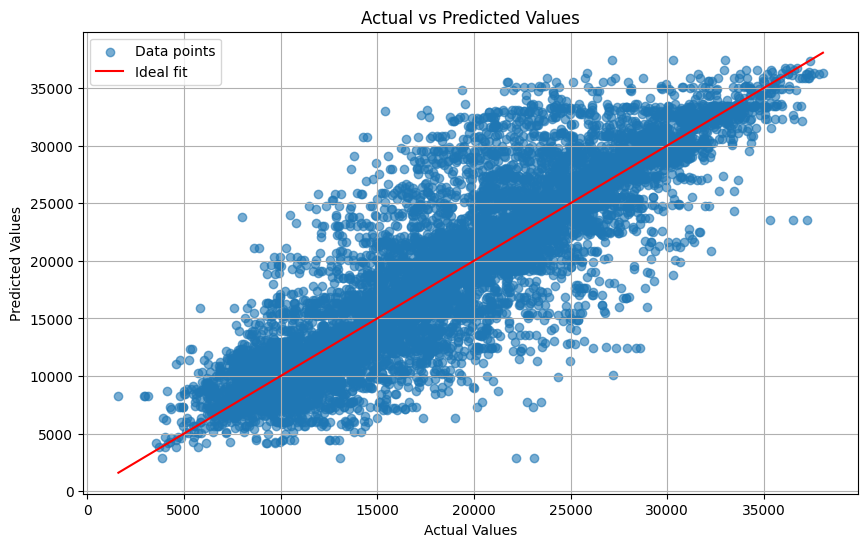

In [65]:
printResults(loadModel("ModelWithoutFeatures"),X1,y,error=1000)
plt.show()


So our data when given a margin of error of about predicts the correct output energy with a margin of error of about 3000 watts with a 72.25% accuracy 

Step 1: Feature Engineering

We can incorporate lag features so how much power was used in the prior days

In [50]:
#Unfortunately, this will cause us to lose 7 rows of data but that isnt that bad. (Due to nan values)

dfs['lag1'] = dfs['PowerConsumption_Zone1'].shift(1) #Lag 1 day behind
dfs['lag2'] = dfs['PowerConsumption_Zone1'].shift(3) #Lag 3 days behind
dfs['lag3'] = dfs['PowerConsumption_Zone1'].shift(7) #Lag approx 1 week behind
dfs['rolling_mean_7'] = dfs['PowerConsumption_Zone1'].rolling(window=7).mean()
dfs = dfs[7:]
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,lag1,lag2,lag3,rolling_mean_7
7,1,1,1,5.496,78.2,0.085,0.055,0.093,2545.0,2600.0,2734.0,3406.0,2751.142857
8,1,1,1,5.678,78.1,0.081,0.066,0.141,2478.0,2545.0,2662.0,2981.0,2679.285714
9,1,1,2,5.491,77.3,0.082,0.062,0.111,2428.0,2478.0,2600.0,2913.0,2610.000000
10,1,1,2,5.516,77.5,0.081,0.051,0.108,2390.0,2428.0,2545.0,2823.0,2548.142857
11,1,1,2,5.471,76.7,0.083,0.059,0.126,2354.0,2390.0,2478.0,2734.0,2493.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,3116.0,3216.0,3339.0,3492.0,3319.571429
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,3043.0,3116.0,3282.0,3474.0,3258.000000
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,2959.0,3043.0,3216.0,3432.0,3190.428571
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,2896.0,2959.0,3116.0,3378.0,3121.571429


In [51]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x/period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x/period * 2 * np.pi))

In [52]:
dfs['month_sin'] = sin_transformer(12).fit_transform(dfs[['Month']])['Month']
dfs['month_cos'] = cos_transformer(12).fit_transform(dfs[['Month']])['Month']

dfs['day_sin'] = sin_transformer(30).fit_transform(dfs[['Day']])['Day']
dfs['day_cos'] = cos_transformer(30).fit_transform(dfs[['Day']])['Day']

dfs['time_sin'] = sin_transformer(24).fit_transform(dfs[['Time']])['Time']
dfs['time_cos'] = cos_transformer(24).fit_transform(dfs[['Time']])['Time']


In [53]:
display(dfs)

,Month,Day,Time,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,lag1,lag2,lag3,rolling_mean_7,month_sin,month_cos,day_sin,day_cos,time_sin,time_cos
7,1,1,1,5.496,78.2,0.085,0.055,0.093,2545.0,2600.0,2734.0,3406.0,2751.142857,5.000000e-01,0.866025,2.079117e-01,0.978148,0.258819,0.965926
8,1,1,1,5.678,78.1,0.081,0.066,0.141,2478.0,2545.0,2662.0,2981.0,2679.285714,5.000000e-01,0.866025,2.079117e-01,0.978148,0.258819,0.965926
9,1,1,2,5.491,77.3,0.082,0.062,0.111,2428.0,2478.0,2600.0,2913.0,2610.000000,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
10,1,1,2,5.516,77.5,0.081,0.051,0.108,2390.0,2428.0,2545.0,2823.0,2548.142857,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
11,1,1,2,5.471,76.7,0.083,0.059,0.126,2354.0,2390.0,2478.0,2734.0,2493.857143,5.000000e-01,0.866025,2.079117e-01,0.978148,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,12,30,23,7.010,72.4,0.080,0.040,0.096,3116.0,3216.0,3339.0,3492.0,3319.571429,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.258819,0.965926
52412,12,30,23,6.947,72.6,0.082,0.051,0.093,3043.0,3116.0,3282.0,3474.0,3258.000000,-2.449294e-16,1.000000,-2.449294e-16,1.000000,-0.258819,0.965926
52413,12,30,0,6.900,72.8,0.086,0.084,0.074,2959.0,3043.0,3216.0,3432.0,3190.428571,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.000000,1.000000
52414,12,30,0,6.758,73.0,0.080,0.066,0.089,2896.0,2959.0,3116.0,3378.0,3121.571429,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.000000,1.000000


In [54]:
X2 = dfs[['month_sin','month_cos','day_sin','day_cos','time_sin','time_cos','Temperature','Humidity','WindSpeed','rolling_mean_7','lag1','lag2','lag3']].to_numpy()
y = dfs['PowerConsumption_Zone1'].to_numpy()
y = y - y.min()

inputSize = X2[0].size
outputSize = int(y.max())
#model = SimpleNeuralNetwork(inputSize,outputSize)
#train(X2,y,model,"ModelWithFeatures")

C:\Users\zainm\AppData\Local\Temp\ipykernel_54040\1377105181.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(modelName)


Correct: 7902/10482
Accuracy on test data: 75.39%


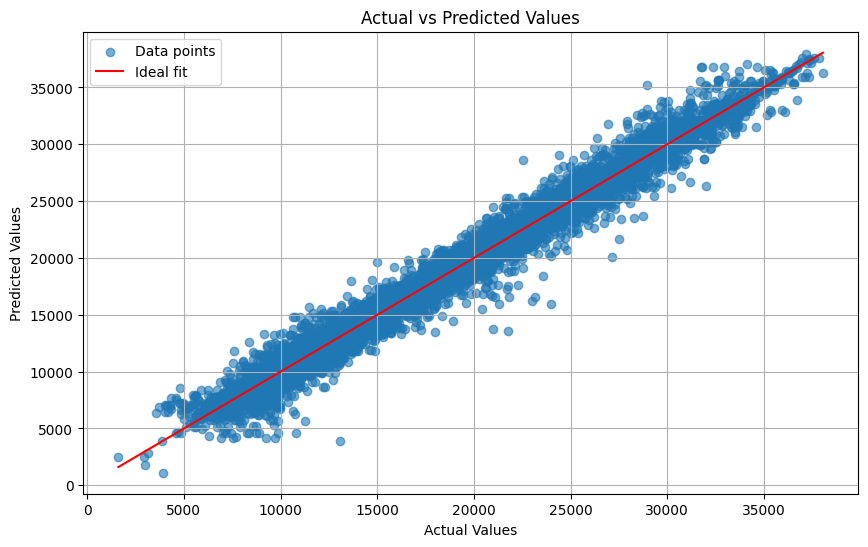

In [62]:
printResults(loadModel("ModelWithFeatures"),X2,y,error=1000)
plt.show()